<a href="https://colab.research.google.com/github/RahulBansal-24/Disease-Prediction-AI/blob/main/Disease_Predictor_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Disease Prediction AI**

---



**1)Dataset upload and visualisation**

Uploading dataset to colab notebook

In [1]:
from google.colab import files
files.upload()

Saving heart_disease_uci.csv to heart_disease_uci.csv


{'heart_disease_uci.csv': b'id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num\n1,63,Male,Cleveland,typical angina,145,233,TRUE,lv hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,0\n2,67,Male,Cleveland,asymptomatic,160,286,FALSE,lv hypertrophy,108,TRUE,1.5,flat,3,normal,2\n3,67,Male,Cleveland,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,2,reversable defect,1\n4,37,Male,Cleveland,non-anginal,130,250,FALSE,normal,187,FALSE,3.5,downsloping,0,normal,0\n5,41,Female,Cleveland,atypical angina,130,204,FALSE,lv hypertrophy,172,FALSE,1.4,upsloping,0,normal,0\n6,56,Male,Cleveland,atypical angina,120,236,FALSE,normal,178,FALSE,0.8,upsloping,0,normal,0\n7,62,Female,Cleveland,asymptomatic,140,268,FALSE,lv hypertrophy,160,FALSE,3.6,downsloping,2,normal,3\n8,57,Female,Cleveland,asymptomatic,120,354,FALSE,normal,163,TRUE,0.6,upsloping,0,normal,0\n9,63,Male,Cleveland,asymptomatic,130,254,FALSE,lv hypertrophy,147,FALSE,1.4,flat,1,reversable defect,2

importing pandas library and reading dataset

In [2]:
import pandas as pd
df = pd.read_csv('heart_disease_uci.csv')

Scanning top 5 rows of dataset

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


displaying columns names

In [4]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


checking for number of null values in each column

In [5]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


selecting numeric value columns in df and filling missing values with mean of column

In [6]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

importing matplotlib and seaborn libraries for data visualisation

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

visualising each numeric column as histogram

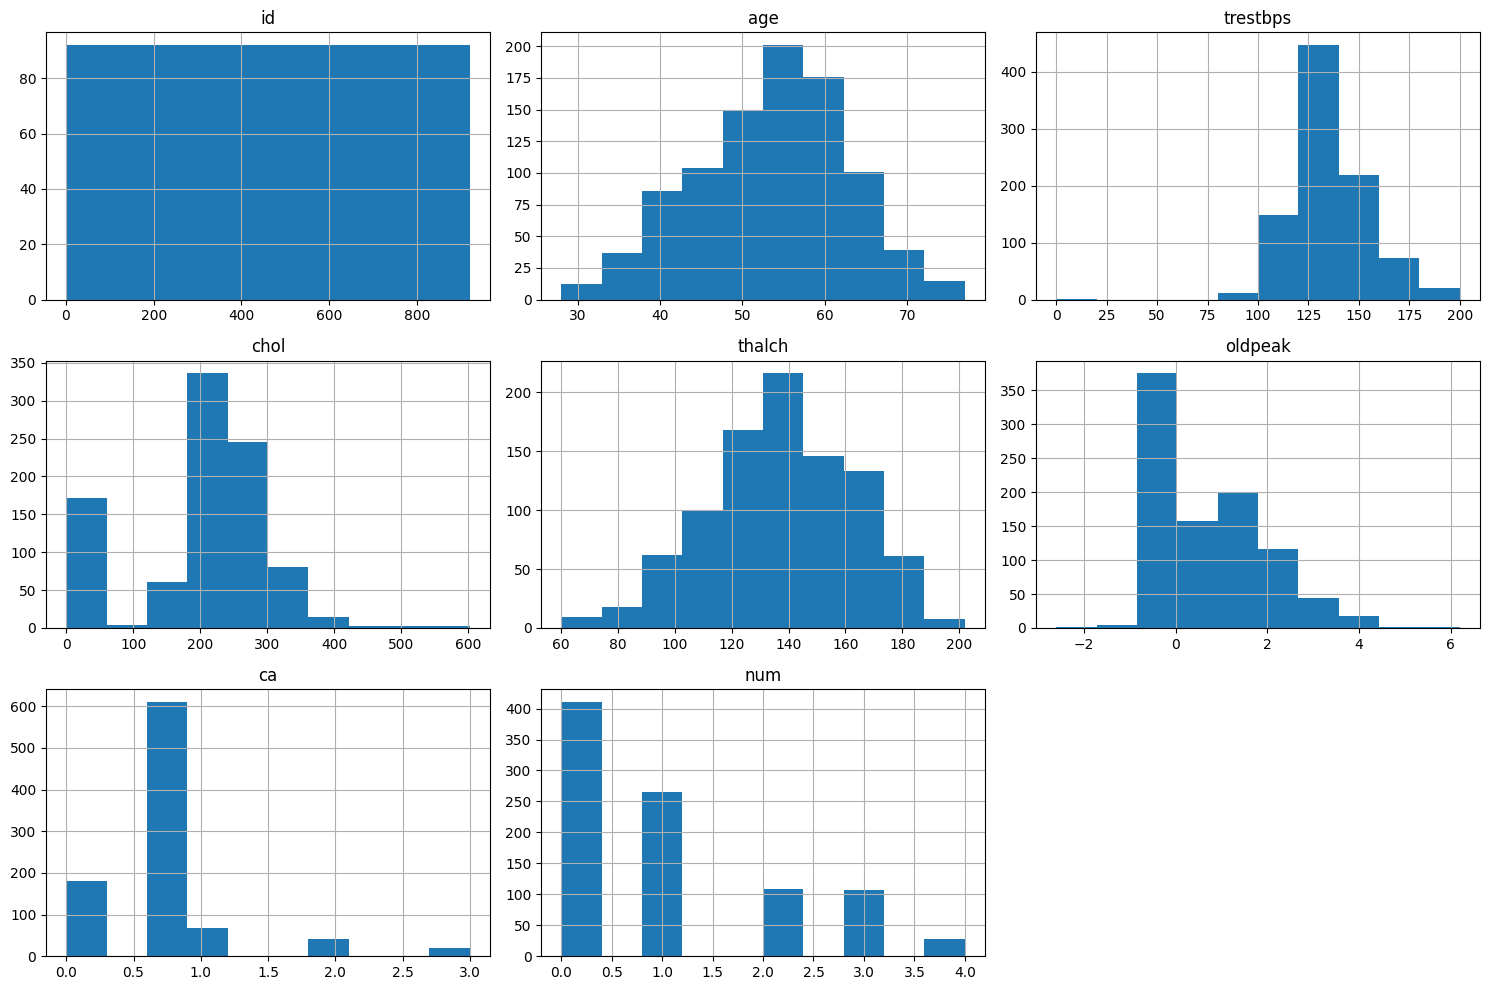

In [8]:
df[numeric_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

visualising numeric columns as a heatmap to see correlations among them

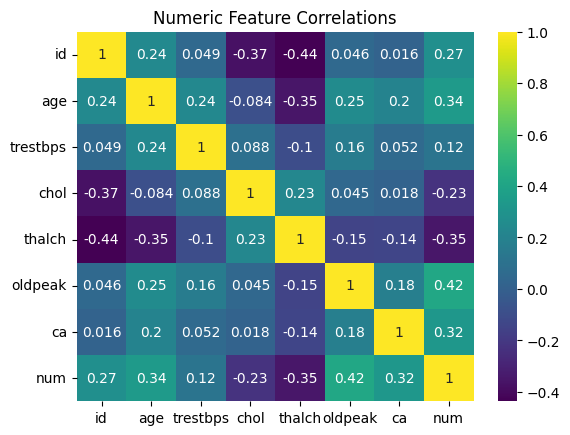

In [9]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='viridis')
plt.title("Numeric Feature Correlations")
plt.show()

**2) Model Training**

making a list of string/textual columns and removing any numerical columns from it

In [10]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
    cat_cols.remove('num') #so that num column doesnt get hot encoded

creating a subset X without num column and a series Y with 0 and 1 values for num column

In [11]:
X = df.drop('num', axis=1)
Y = (df['num'] > 0).astype(int) #0 : no disease , 1 : disease present

one hot encoding cat_cols (converting categorical columns into seperate boolean 0/1 value columns for each category in column)

In [12]:
X = pd.get_dummies(X, columns=cat_cols)
print("Final feature columns :",X.columns)

Final feature columns : Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


importing train_test_split function and StandardScaler for data preprocessing

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

splitting dataset into training set and testing set with 80% dataset for training and 20% for testing

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #random_state=42 ensures we get the same split every time we run the code

Scaling numerical features so they are on similar scale with new values calculated as:

    new value = (old value - mean of col)/standard deviation

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

importing LogisticRegression algorithm from Scikit-learn library

In [16]:
from sklearn.linear_model import LogisticRegression

Creating an instance of LogisticRegression model and training the model

In [17]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, Y_train)

LogisticRegression()

**3) Model Evaluation**

importing accuracy_score, classification_report, confusion_matrix from Scikit-learn library

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

displaying accuracy and classification report of model

In [19]:
Y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy: ",accuracy_score(Y_test, Y_pred_lr))
print("Classification Report:")
print(classification_report(Y_test,Y_pred_lr))

Logistic Regression Accuracy:  0.842391304347826
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



displaying confusion matrix for model

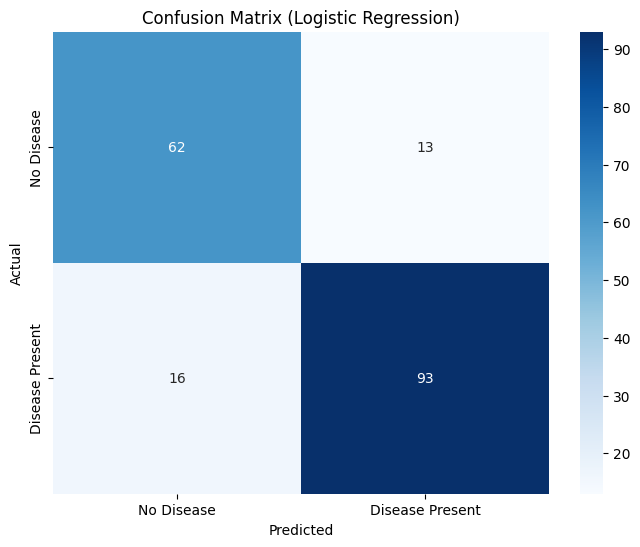

In [20]:
cm = confusion_matrix(Y_test, Y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease Present'], yticklabels=['No Disease', 'Disease Present'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**4) Random Forest Model**

importing RandomForestClassifier algorithm from Scikit-learn

In [21]:
from sklearn.ensemble import RandomForestClassifier

creating an instance of RandomForest model and training the model

In [22]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, Y_train)

RandomForestClassifier(random_state=42)

displaying accuracy and classification report of model

In [23]:
Y_pred_rf=rf_model.predict(X_test_scaled)
print("Random Forest Accuracy: ",accuracy_score(Y_test, Y_pred_rf))
print("Classification Report:")
print(classification_report(Y_test,Y_pred_rf))

Random Forest Accuracy:  0.8858695652173914
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        75
           1       0.92      0.89      0.90       109

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



displaying confusion matrix for model

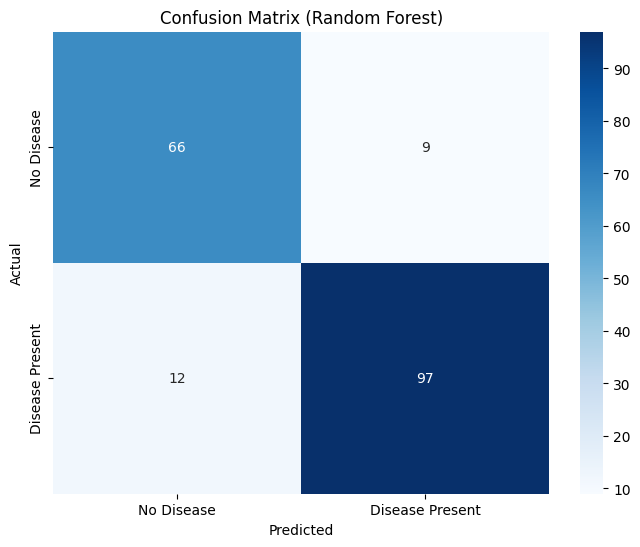

In [24]:
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease Present'], yticklabels=['No Disease', 'Disease Present'])
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

input feature importance in model

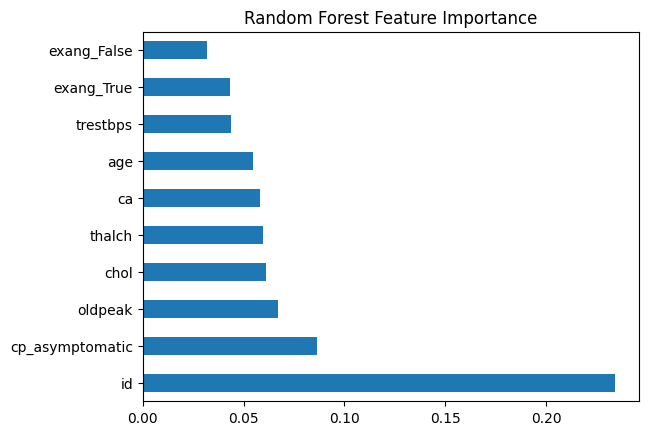

In [25]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.show()

**5) Saving the Model**

importing joblib library and saving rf_model and scalar

In [26]:
import joblib
joblib.dump(rf_model, 'heart_disease_rf_model.pkl')
joblib.dump(scaler, 'heart_disease_scaler.pkl')

['heart_disease_scaler.pkl']

**6) User Data Upload and Prediction**

creating a user template for entering data

In [27]:
sample = X.head(1)
sample.to_csv('User_template.csv', index=False)
print("User template saved as 'User_template.csv'")

User template saved as 'User_template.csv'


getting dataset for prediction from user

In [28]:
from google.colab import files
user_dataset = files.upload()

Saving heart_dataset_sample.csv to heart_dataset_sample.csv


converting user dataset into dataframe

In [29]:
user_df = pd.read_csv(list(user_dataset.keys())[0])

getting column lists from original dataset for column matching and keeping only those columns in  user_df which are present in trained df

In [30]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()

#dropping columns which are extra in user_df
numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]

filling missing values in user_df columns

In [31]:
user_df[numeric_cols] = user_df[numeric_cols].fillna(user_df[numeric_cols].mean())
for col in cat_cols:
    user_df[col] = user_df[col].fillna("Unknown")
for col in bool_cols:
    user_df[col] = user_df[col].astype(int)

one hot encoding cat_cols

In [32]:
user_df_encoded = pd.get_dummies(user_df, columns=cat_cols)

alligning columns in trained dataset order

In [33]:
user_df_encoded = user_df_encoded.reindex(columns=X.columns, fill_value=0)

Scaling user data

In [34]:
scaler = joblib.load('heart_disease_scaler.pkl')
user_df_scaled = scaler.transform(user_df_encoded)

loading saved model and predicting results

In [35]:
model = joblib.load('heart_disease_rf_model.pkl')
prediction = model.predict(user_df_scaled)
user_df['Heart_Disease_Prediction'] = prediction #adding prediction results to a new column in user df

displaying result

In [36]:
from IPython.display import display
display(user_df)

,age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,Heart_Disease_Prediction
0,58,130,220,1,normal,150,False,1.4,flat,0,fixed defect,0,1,0,0,0,1,0
1,67,160,276,0,lv hypertrophy,108,True,1.5,flat,3,normal,0,1,1,0,0,0,1
2,42,120,230,0,normal,170,False,1.0,upsloping,0,reversable defect,1,0,0,0,1,0,0
3,50,130,210,0,lv hypertrophy,158,False,0.8,flat,0,normal,0,1,0,0,1,0,0
4,45,114,230,0,normal,165,False,1.1,downsloping,0,normal,1,0,0,1,0,0,0
